In [17]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from scipy.stats import skew, kurtosis

In [18]:
!pip install missingno

In [19]:
import missingno as msno

### Load and read the dataset ###

In [20]:
at=pd.read_csv(r"\Users\User\Downloads\Titanic-Dataset.csv")

### Display the 1st 5 rows ###

In [21]:
at.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic info about the dataset ###

In [22]:

at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Summary staistics

In [23]:
at.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
at.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [25]:
# The shape of the dataset
at.shape

(891, 12)

In [26]:
# checking for duplicate
at.duplicated().sum()

0

In [27]:
# Checking for missing values
at.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Preprocessing - Handling and checking  missing values after imputation. ###

In [37]:

num_imputer=SimpleImputer(strategy='median')
cat_imputer=SimpleImputer(strategy='most_frequent')

num_columns=['Age']
cat_columns=['Cabin','Embarked']

at[num_columns] = num_imputer.fit_transform(at[num_columns])

at[cat_columns] = cat_imputer.fit_transform(at[cat_columns])

print("Missing values after imputation:")
print(at.isnull().sum())

Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Show major moments, correlation matrix and basic description ###

In [36]:

print("Initial DataFrame Info:")
print(at.info())

numeric_at = at.select_dtypes(include='number')

mean_values = numeric_at.mean()
median_values = numeric_at.median()
std_dev_values = numeric_at.std()
skewness_values = numeric_at.apply(skew)
kurtosis_values = numeric_at.apply(kurtosis)

moments_summary = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Standard Deviation': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

print("\nMajor Moments Summary:")
print(moments_summary)

correlation_matrix = numeric_at.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

description = numeric_at.describe()
print("\nBasic Description:")
print(description)

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Major Moments Summary:
                   Mean    Median  Standard Deviation  Skewness   Kurtosis
PassengerId  446.000000  446.0000          257.353842  0.000000  -1.200003
Survived       0.383838    0.0000        

### Exploratory data Analysis(EDA) showing Function and Docstring per plot ###

In [60]:
def plot_Survived_by_Pclass(at):
    """
    Plots the mean survival rate by passenger class (Pclass).

    Parameters:
    Titaninic dataset containing 'Survived' and 'Pclass'.
    
    This function groups the data by 'Pclass', calculates the mean survival rate for each 
    class, and plots the result as a bar chart with appropriate labels, colors, and title.

    plot_Survived_by_Pclass

    Returns:
    None
    """
    Survived_by_Pclass = at.groupby('Pclass')['Survived'].mean()
    Survived_by_Pclass.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Bar plot of Survived by Pclass')
    plt.xlabel('Pclass')
    plt.ylabel('Survived')
    plt.xticks(rotation=0)
    plt.show()

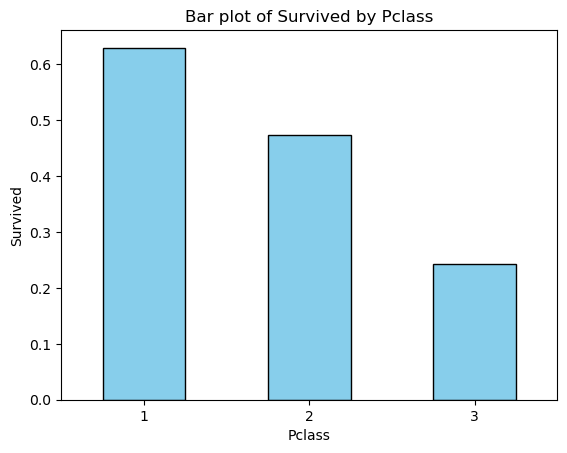

In [61]:
plot_Survived_by_Pclass(at)

In [58]:
def plot_Sex_distribution_by_Age(at):
    """
    Plots a boxplot showing the age distribution by sex, differentiated by survival status.

    Parameters:
    a titanic dataset containing the columns 'Sex', 'Age', and 'Survived'.
    
    This function creates a boxplot that shows the distribution of ages across genders ('Sex') 
    and survival status ('Survived'). The plot uses pastel colors and includes labels and a 
    title.

    plot_Sex_distribution_by_Age(at)

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Sex', y='Age', data=at, palette='pastel', hue='Survived')
    plt.title('Box plot of Sex Distribution by Age')
    plt.xlabel('Sex')
    plt.ylabel('Age')
    plt.legend(title='Survived', loc='upper right')
    plt.show()

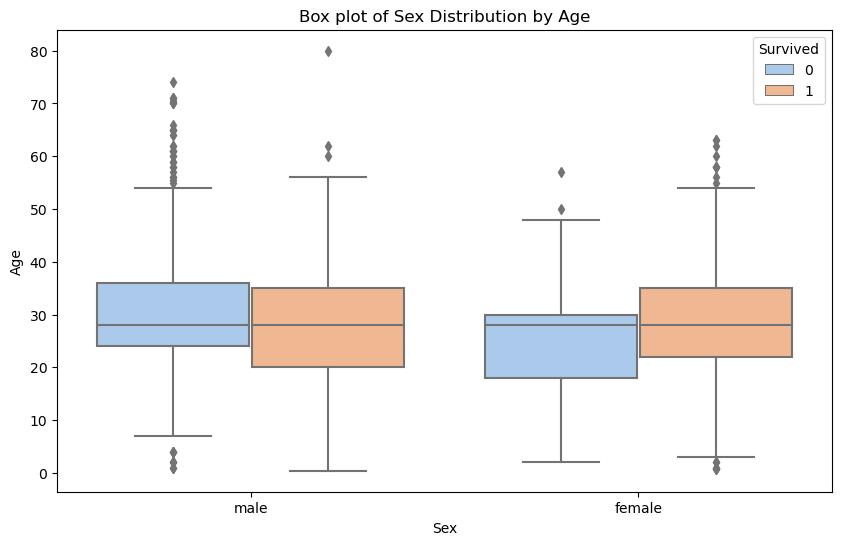

In [59]:
plot_Sex_distribution_by_Age(at)

In [56]:
def plot_Pclass_vs_Fare(at):
    """
    Plots a line plot of passenger class (Pclass) vs. fare, with an additional hue for the 
    number of parents/children aboard (Parch).

    A titanic dataset containing the columns 'Pclass', 'Fare', and 'Parch'.
    
    This function creates a line plot showing how the fare varies across passenger classes 
    (Pclass) and differentiates lines by the 'Parch' value. The plot includes markers on data 
    points, a cool-warm color palette, and appropriate labels and a title.

    plot_pclass_vs_fare(at)

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Pclass', y='Fare', data=at, hue='Parch', marker='o', palette='coolwarm')
    plt.title('Line Plot of Pclass vs Fare')
    plt.xlabel('Pclass')
    plt.ylabel('Fare')
    plt.legend(title='Parch')
    plt.show()

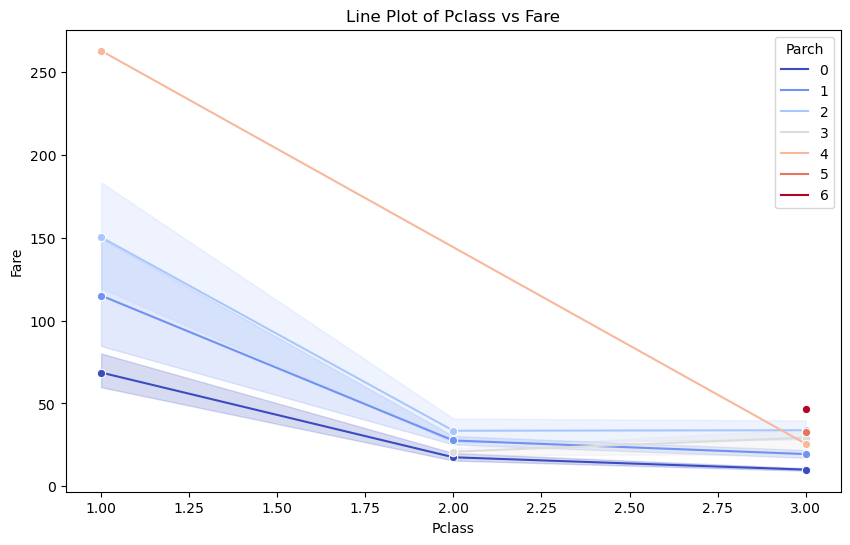

In [57]:
plot_Pclass_vs_Fare(at)